In [3]:
# Imports
import pandas as pd # type: ignore
import numpy as np # type: ignore

# viz
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore
import networkx as nx # type: ignore

# utils
import sys
sys.path.append('../')

In [4]:

#Import the corrected, clean data - 
df = pd.read_csv("../data/processed/data.csv")

In [5]:
df.head()

,order_id,payment_value,Rating,region,Product_weight_kg,distance_km,Product_category,Product_size,No_photos,Product_price,season,is_delivery_late,Product_price.1,freight_value,Product_category_encoded,order_purchase_timestamp
0,d455a8cb295653b55abda06d434ab492,916.02,5.0,South,11.8,687.434185,eletroportateis,61920.0,2.0,895.0,9,0,895.0,21.02,31,2017-09-26 22:17:05
1,7f39ba4c9052be115350065d07583cac,916.02,1.0,Southeast,11.8,417.139650,eletroportateis,61920.0,2.0,895.0,10,0,895.0,21.02,31,2017-10-18 08:16:34
2,9dc8d1a6f16f1b89874c29c9d8d30447,916.02,5.0,Southeast,11.8,714.295670,eletroportateis,61920.0,2.0,895.0,10,0,895.0,21.02,31,2017-10-12 13:33:22
3,0f548bd29148ebc519d6495e37a284e1,264.16,5.0,Southeast,9.0,389.663761,ferramentas_jardim,19656.0,1.0,99.0,9,0,99.0,33.08,40,2017-09-03 08:06:30
4,0f548bd29148ebc519d6495e37a284e1,264.16,5.0,Southeast,9.0,389.663761,ferramentas_jardim,19656.0,1.0,99.0,9,0,99.0,33.08,40,2017-09-03 08:06:30


In [5]:
df.columns

Index(['order_id', 'payment_value', 'Rating', 'region', 'Product_weight_kg',
       'distance_km', 'Product_category', 'Product_size', 'No_photos',
       'Product_price', 'season', 'is_delivery_late', 'Product_price.1',
       'freight_value', 'Product_category_encoded',
       'order_purchase_timestamp'],
      dtype='object')

<h3>EDA Distributions</h3>

C:\Users\avant\AppData\Local\Temp\ipykernel_21952\1086424274.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Rating', palette='coolwarm', color='orange')


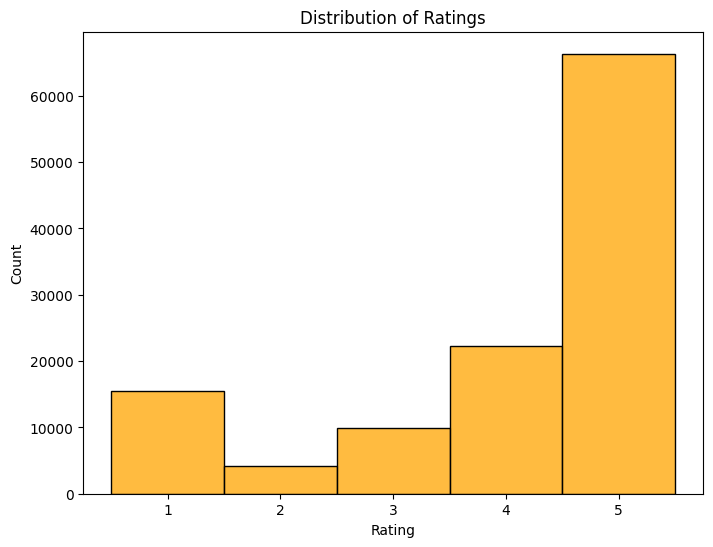

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Rating', palette='coolwarm', color='orange')
plt.title(f'Distribution of Ratings')
plt.show()

C:\Users\avant\AppData\Local\Temp\ipykernel_21952\21417013.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_delivery_late', data=df, palette='coolwarm')


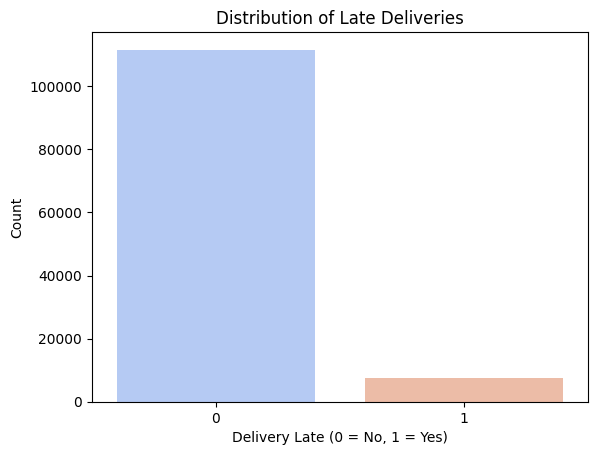

In [39]:
## Dist of "Is Delivery Late"
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of 'is_delivery_late'
sns.countplot(x='is_delivery_late', data=df, palette='coolwarm')

# Adding labels and title
plt.xlabel('Delivery Late (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of Late Deliveries')
plt.show()

In [47]:
np.sum(df['is_delivery_late']==1)

# ==0 count is ~111K
# ==1 count is ~7500

np.int64(7559)

<h3> Correlation Analysis </h3>

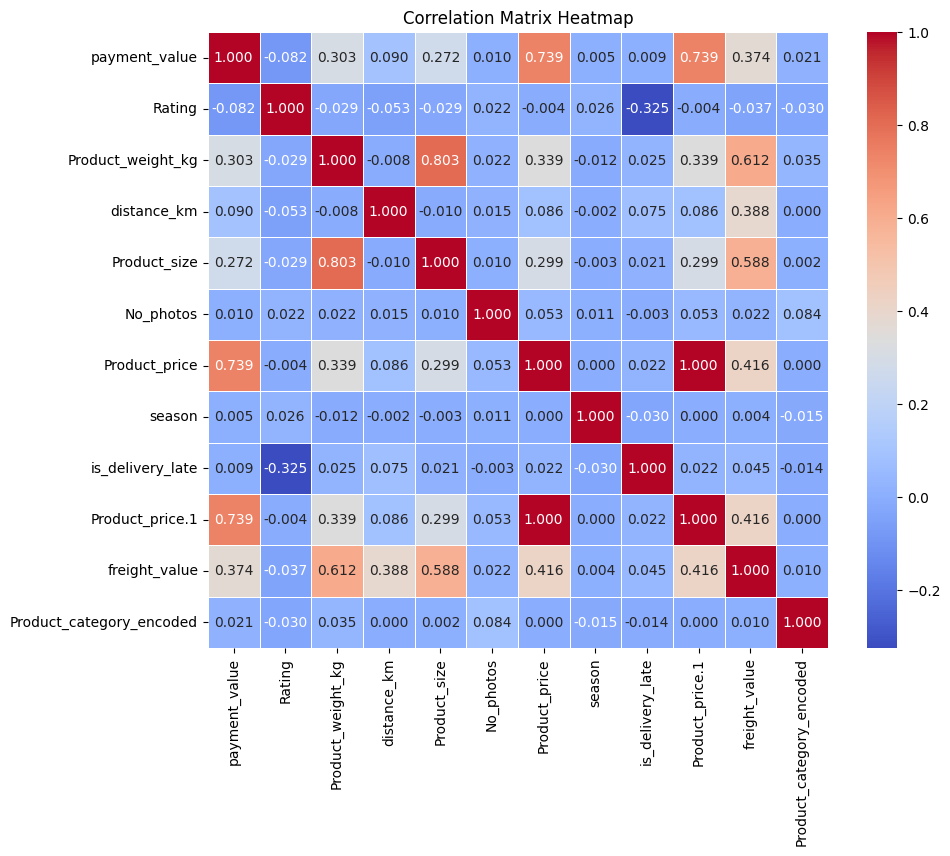

In [6]:
# Extract numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Run correlation analysis
correlation_matrix = numerical_df.corr()

# # Display the correlation matrix
# print("Correlation matrix:")
# print(correlation_matrix)

plt.figure(figsize=(10,8))  # Optional: Adjust the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<h3> Chi-Square Test </h3>

In [12]:
import pandas as pd
from scipy.stats import chi2_contingency

In [14]:

# Example: Let's say you have two columns: 'delays' and 'ratings'
# Create a contingency table
contingency_table = pd.crosstab(df['is_delivery_late'], df['Rating'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

# Interpretation of results
if p < 0.05:
    print("There is a significant association between delivery delays and customer ratings.")
else:
    print("There is no significant association between delivery delays and customer ratings.")


Chi-Square Statistic: 13453.928812828954
P-value: 0.0
Degrees of Freedom: 4
Expected Frequencies Table:
 [[14465.8556701   3902.44304505  9276.97536946 20927.10867909
  62205.6172363 ]
 [  962.1443299    259.55695495   617.02463054  1391.89132091
   4137.3827637 ]]
There is a significant association between delivery delays and customer ratings.


<h3> Regression Analysis </h3>

Since is_delivery_late is a binary variable, we can run a binary logistic regression. 

Rating or Review score is an ordinal variable (varies from 1-5). We try to run an ordinal logistic regression in order to account for the ordering of the ratings and the fact that the difference between them cannot be treated as mathematical. 


<h3> Simple Linear Regression </h3>

For benchmarking purposes, we start with a simple linear regression

In [8]:
df['Rating'].dtype

dtype('float64')

In [14]:
df.isnull().sum()

order_id                       0
payment_value                  3
Rating                       997
region                         0
Product_weight_kg            853
distance_km                 1414
Product_category            2542
Product_size                 853
No_photos                   2542
Product_price                833
season                         0
is_delivery_late               0
Product_price.1              833
freight_value                833
Product_category_encoded       0
order_purchase_timestamp       0
dtype: int64

In [16]:
df_clean_lr = df.dropna(subset=['Rating'])

In [18]:
df_clean_lr.isnull().sum()

order_id                       0
payment_value                  3
Rating                         0
region                         0
Product_weight_kg            834
distance_km                 1393
Product_category            2509
Product_size                 834
No_photos                   2509
Product_price                814
season                         0
is_delivery_late               0
Product_price.1              814
freight_value                814
Product_category_encoded       0
order_purchase_timestamp       0
dtype: int64

In [19]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'df' is your dataframe
# Define the dependent variable (Y) as 'Rating' (the numerical variable)
Y = df_clean_lr['Rating']

# Define the independent variable (X) as 'is_delivery_late' (the binary variable)
X = df_clean_lr['is_delivery_late']

# Add a constant to the independent variable to account for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                 1.391e+04
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:09:39   Log-Likelihood:            -2.0086e+05
No. Observations:              118146   AIC:                         4.017e+05
Df Residuals:                  118144   BIC:                         4.017e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.1328      0.004  

The R-squared is 10.5% and the coefficient of is_delivery_late is -1.87 which means that ratings go down by 1.87 stars if a particular order is late. <br>

This is by no means an accurate measure of the effect because it operates under the assumption that 'Rating' is a numerical variable. Additionally, it does not account for any confounding factors. This approach however, is used to benchmark the impact of our independent variable on our dependent variable. 

<h4>Ordinal Logistic Regression</h4>

In [15]:
df['Rating'].unique()

array([ 5.,  1.,  4.,  3.,  2., nan])

In [7]:

import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel


In [11]:
df.columns

Index(['order_id', 'payment_value', 'Rating', 'region', 'Product_weight_kg',
       'distance_km', 'Product_category', 'Product_size', 'No_photos',
       'Product_price', 'season', 'is_delivery_late', 'Product_price.1',
       'freight_value', 'Product_category_encoded',
       'order_purchase_timestamp'],
      dtype='object')

In [12]:
df['season'].unique()

array([ 9, 10,  8,  7, 12,  5,  3,  2,  1,  6, 11,  4])

In [25]:
print(df['Rating'].isnull().sum()) #997
#use the cleaned version of df - df_clean_lr
print(df_clean_lr['Rating'].isnull().sum())

997
0


In [27]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Ensure Rating is treated as categorical with ordering
df_clean_lr['Rating'] = pd.Categorical(df_clean_lr['Rating'], categories=[1, 2, 3, 4, 5], ordered=True)

# Define the dependent variable (Y) as 'Rating'
Y = df_clean_lr['Rating']

# Define the independent variable (X) as 'is_delivery_late'
X = df_clean_lr[['is_delivery_late']]

# # Add a constant (intercept)
# X = sm.add_constant(X)

# Fit the ordinal logistic regression model
model = OrderedModel(Y, X, distr='logit')
result = model.fit(method='bfgs')

# Print the summary of the model
print(result.summary())


C:\Users\avant\AppData\Local\Temp\ipykernel_27388\3718559878.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_lr['Rating'] = pd.Categorical(df_clean_lr['Rating'], categories=[1, 2, 3, 4, 5], ordered=True)


Optimization terminated successfully.
         Current function value: 1.189126
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
                             OrderedModel Results                             
Dep. Variable:                 Rating   Log-Likelihood:            -1.4049e+05
Model:                   OrderedModel   AIC:                         2.810e+05
Method:            Maximum Likelihood   BIC:                         2.810e+05
Date:                Tue, 22 Oct 2024                                         
Time:                        09:50:47                                         
No. Observations:              118146                                         
Df Residuals:                  118141                                         
Df Model:                           1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

Coefficient for is_delivery_late (-2.2904):A negative coefficient indicates that late deliveries are associated with lower ratings. Specifically, for a one-unit increase in is_delivery_late (from on-time to late), the log odds of a higher rating decreases by approximately 2.29.

These thresholds represent the boundaries between the different rating categories (1, 2, 3, 4, 5). They allow the model to distinguish between adjacent rating levels.
Each threshold separates the probability of getting a rating below a certain value from a rating above that value.

Delivery delays have a significant and negative impact on customer ratings. The model suggests that when a delivery is late, it significantly decreases the odds of a higher rating.

<h3> Difference-in-Differences (DiD) </h3>

In [36]:
df.columns

Index(['order_id', 'payment_value', 'Rating', 'region', 'Product_weight_kg',
       'distance_km', 'Product_category', 'Product_size', 'No_photos',
       'Product_price', 'season', 'is_delivery_late', 'Product_price.1',
       'freight_value', 'Product_category_encoded',
       'order_purchase_timestamp'],
      dtype='object')

In [37]:
import statsmodels.formula.api as smf

In [20]:
# Assuming you have a "before" and "after" column and a "treatment" column indicating delay
df['post'] = (df['order_purchase_timestamp'] > '2023-01-01').astype(int)  # assuming a specific date for "post"
df['treatment'] = df['is_delivery_late']  # 1 if delivery is late, 0 if not
df['interaction'] = df['treatment'] * df['post']

# Run a regression model for DiD
model = smf.ols('Rating ~ post + treatment + interaction', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                 1.391e+04
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:45:20   Log-Likelihood:            -2.0086e+05
No. Observations:              118146   AIC:                         4.017e+05
Df Residuals:                  118144   BIC:                         4.017e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.1328      0.004   1038.411      

c:\Users\avant\source\dso585\causal-attribution-analysis\env\lib\site-packages\statsmodels\regression\linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
